## Esame di Metodi Numerici 6 Maggio 2024 

## Esercizo 1
- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``'test_14_09_2023.mat'``.  Risolvere il sistema confrontando almeno due tra i metodi  visti  per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.
- 
Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_06_05_2024.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


                                       [10 punti]
                                         


m = 400
n = 400
Matrice sparsa:  True
Simmetrica e definita positiva: True
Diagonale dominante:  False
raggio spettrale Gauss-Seidel SOR  0.7406335664970387
Soluzione Gauss-Siedel-SOR:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Soluzione Gradiente Coniugato:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


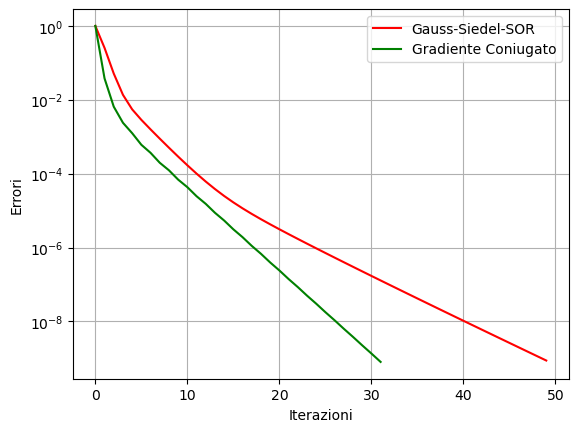

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from SolveTriangular import *

dati = loadmat('test_06_05_2024.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

# plt.spy(A)

print("m =", A.shape[0])
print("n =", A.shape[1])

# La matrice è quadrata e grande
# Testiamo se è sparsa
def isSparse(A):
    return np.count_nonzero(A) / A.size < 0.33

print("Matrice sparsa: ", isSparse(A))

# La matrice è quadrata, inoltre è grande e sparsa
# Testiamo se è simmetrica e definita positiva
def isSimmetric(A):
    return np.allclose(A.T, A)

def isDefPos(A):
    return isSimmetric(A) and np.all(np.linalg.eigvals(A) > 0)

print("Simmetrica e definita positiva:", isDefPos(A))

# Testiamo per sicurezza anche se è a diagonale dominante
def isDiagonalDominant(A):
    A_abs = np.abs(A)
    return np.all(2 * np.diag(A_abs) >= np.sum(A_abs, axis=1))

print("Diagonale dominante: ", isDiagonalDominant(A))

# La matrice è simmetrica e definita positiva
# Possiamo quindi usare:
# - Gauss-siedel
# - Gauss-siedel-SOR
# - Gradiente steepestdescent
# - Gradiente coniugato

# Scegliamo di usare e confrontare Gauss-siedel-SOR e Gradiente Coniugato
# GAUSS-SIEDEL-SOR
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d= np.diag(A)
    D= np.diag(d)
    Dinv= np.diag(1/d)
    E= np.tril(A, -1)
    F= np.triu(A, 1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T= np.linalg.inv(Momega) @ Nomega
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it < it_max and errore >= toll:
        temp= b - (F @ xold)
        xtilde, flag = Lsolve(M, temp)
        xnew= (1-omega) * xold + omega * xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet

# GRADIENTE CONIUGATO
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap= A @ p
        alpha = -(r.T @ p)/(p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= (r.T @ r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma * p   
    
    return x,vet_r,vec_sol,it


# Test dei due algoritmi
n = A.shape[0]
it_max = 1500
toll = 1e-9
x0 = np.zeros((n,1))
omega = 1.2

sol_gauss, it_gauss, err_gauss = gauss_seidel_sor(A, b, x0, toll, it_max, omega)
sol_grad, err_grad, vec_sol_grad, it_grad = conjugate_gradient(A, b, x0, it_max, toll)

print("Soluzione Gauss-Siedel-SOR: ", sol_gauss[0:5]) # tronchiamo poiché troppo lungo
print("Soluzione Gradiente Coniugato: ", sol_grad[0:5]) # tronchiamo poiché troppo lungo

plt.grid(True)
plt.semilogy(np.arange(0, it_gauss), err_gauss, "r-")
plt.semilogy(np.arange(0, it_grad + 1), err_grad, "g-")
plt.legend(['Gauss-Siedel-SOR', 'Gradiente Coniugato'])
plt.xlabel('Iterazioni')
plt.ylabel('Errori')
plt.show()

# Notiamo, dal grafico, che il Gradiente Coniugato converge più velocemente.
# Infatti, impiega circa 30 iterazioni contro le quasi 50 di Gauss-Siedel-SOR

# [TOT: 32 min]

- Data la matrice 
$$A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],$$
Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per  verificarle.

                                                [2 punti]

In [2]:
# La fattorizzazione di Gauss senza pivoting è possibile se sono verificate le seguenti condizioni:
# - La matrice è quadrata
# - Ogni sotto-matrice di testa è non singolare (ovvero ha determinante diverso da 0)

# Ora scriviamo il codice per verificare queste condizioni
def testMatriceQuadrata(A):
    return A.shape[0] == A.shape[1]

def testSottoMatriciDiTestaNonSingolari(A):
    n = A.shape[0]
    for k in range(1, n):
        A_sub = A[0:k, 0:k]
        if np.linalg.det(A_sub) == 0:
            return False
    return True

# Verifichiamo le condizioni
A = np.array([
    [1, 2, 3, 4],
    [2, -4, 6, 8],
    [-1, -2, -3, -1],
    [5, 7, 0, 1]
])

print("Test matrice quadrata: ", testMatriceQuadrata(A))
print("Test sotto-matrici di testa non singolari: ", testSottoMatriciDiTestaNonSingolari(A))

# Il secondo test restituisce FALSE, perciò non è possibile applicare Gauss senza pivoting.
# Infatti, è evidente che, nella la sotto-matrice di testa di indice 3 (matrice in alto a sinistra 3x3),
# la terza colonna si può scrivere come la seconda colonna moltiplicata per 1.5 (combinazione lineare),
# facendo in modo che il determinante sia == 0 e quindi che la sotto-matrice sia singolare

# [TOT: 14 min]

Test matrice quadrata:  True
Test sotto-matrici di testa non singolari:  False


## Esercizio 2
Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. 
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).
  
                                          [6] punti

- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.
                                        [1] punto
                                        
Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$ 

                                        [1] punto
                                        
Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto
                                            
Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$. 

                                       [1] punto

Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.
                                         
                                         [3 punti]

Per n = 5


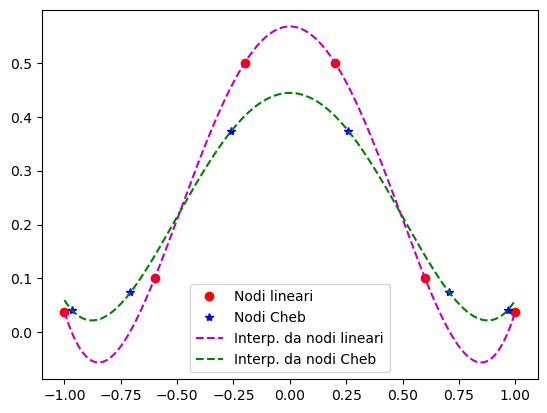

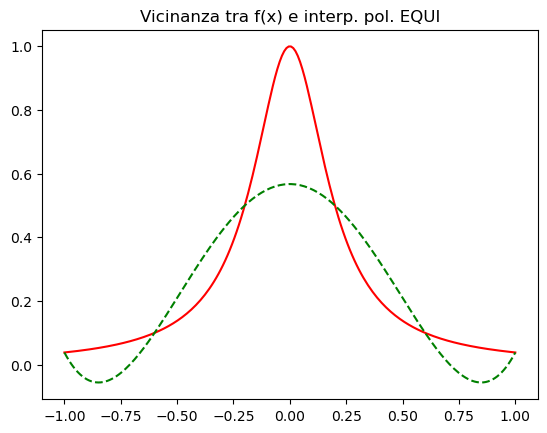

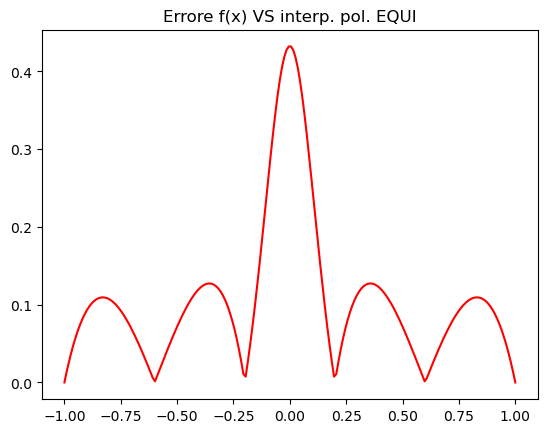

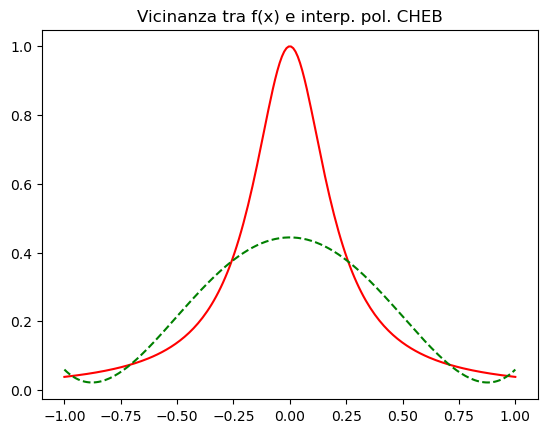

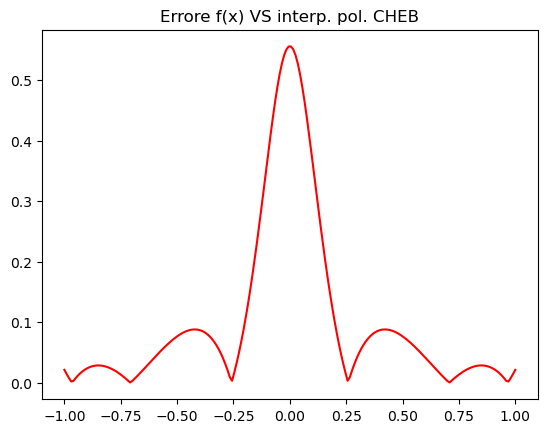

Per n = 10


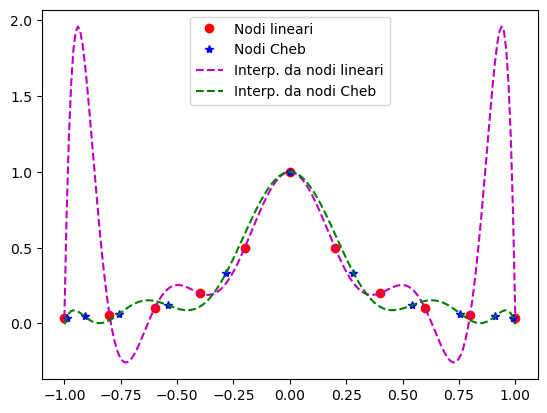

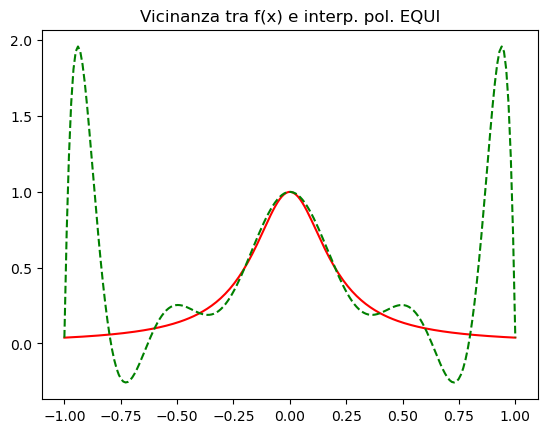

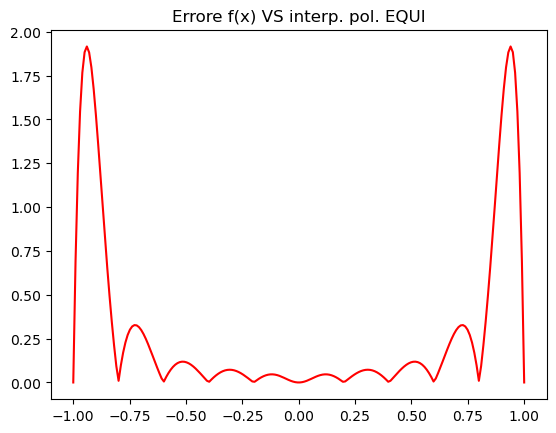

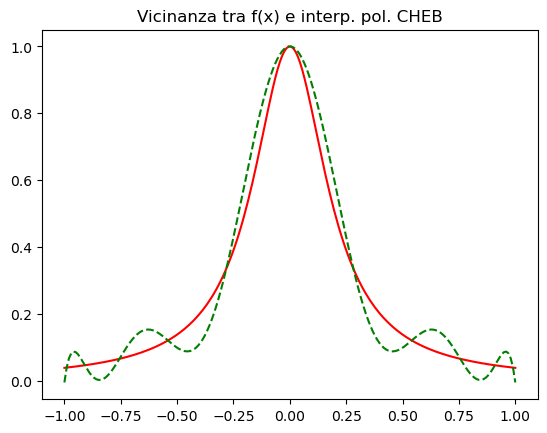

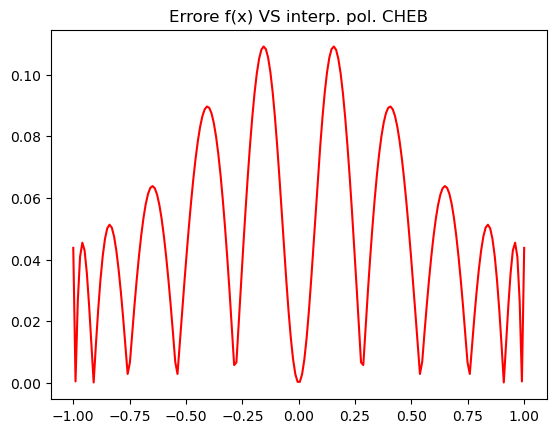

Per n = 15


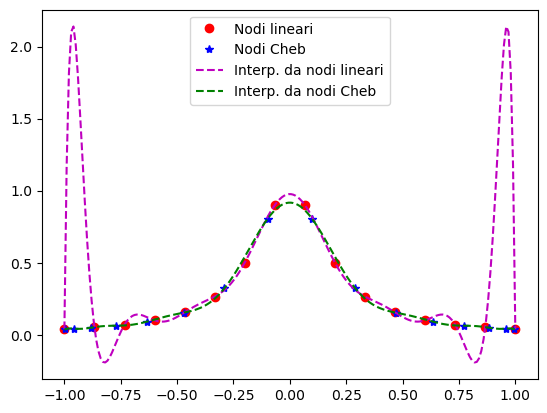

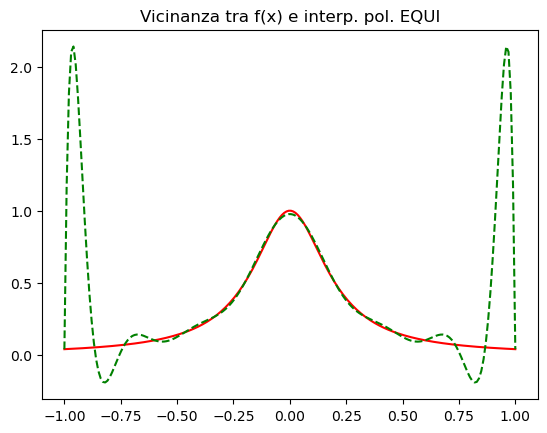

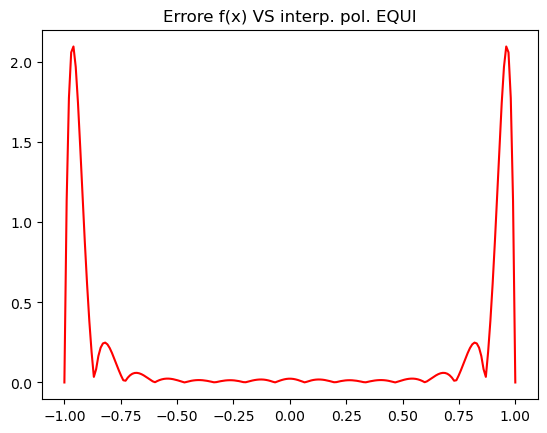

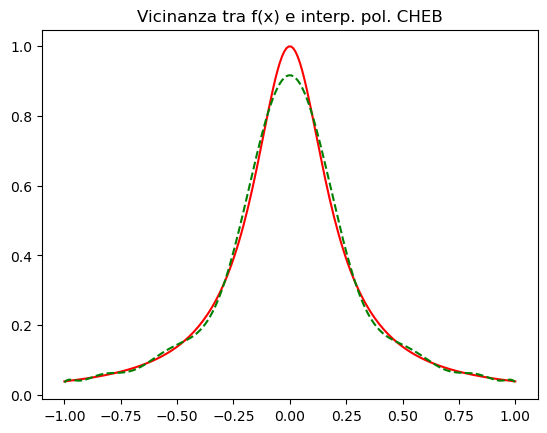

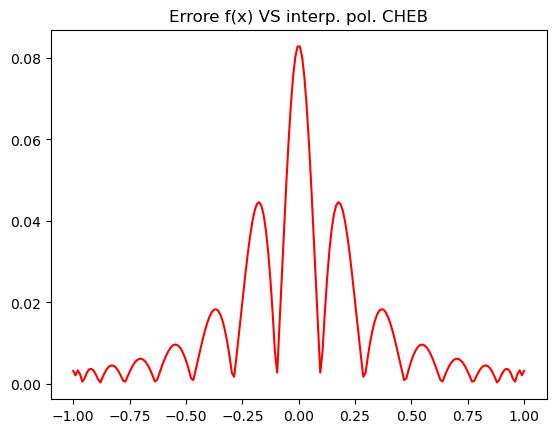

Per n = 18


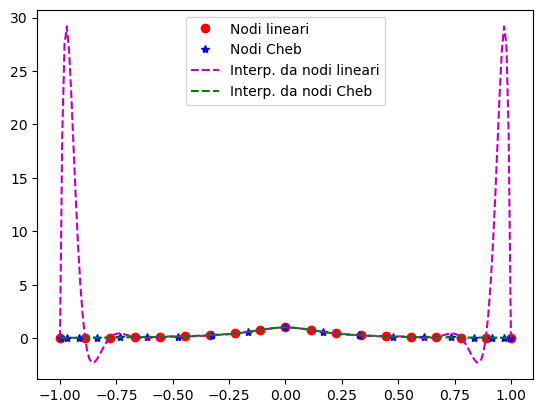

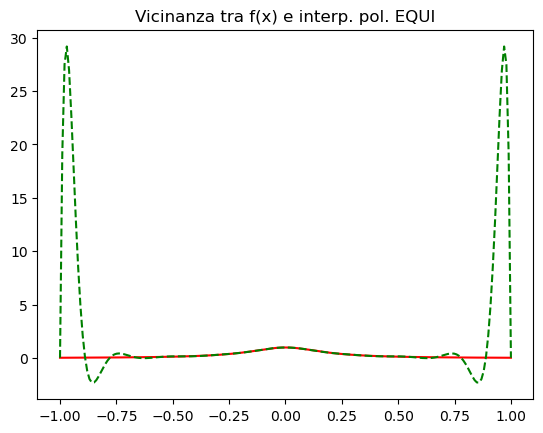

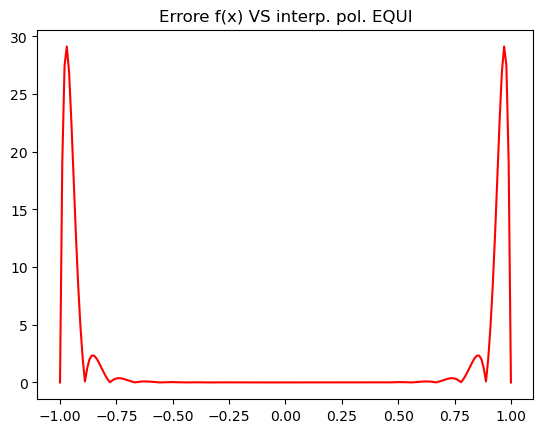

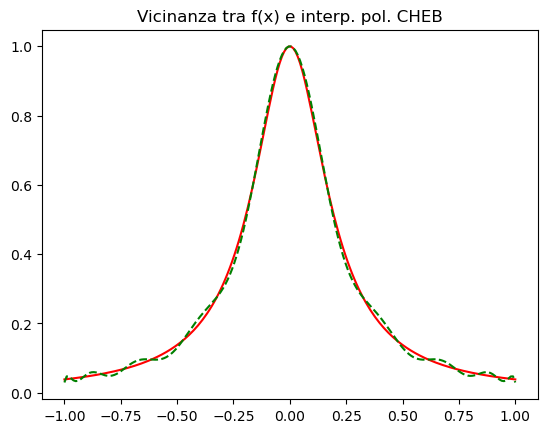

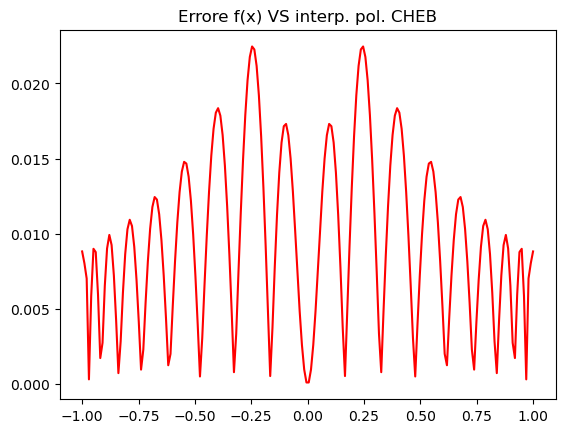

In [3]:
# [PUNTO 1]
# Generatore di polinomi di Lagrange
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j], xnodi[j+1:n])
    
    num= np.poly(xzeri)
    den= np.polyval(num, xnodi[j])
    
    p=num/den
    
    return p

# Interpolatore di Lagrange
def InterpL(x, y, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p= plagr(x, j)
        L[:,j]= np.polyval(p, xx)

     return L@y

# Zeri di Chebyshev
def zeri_Cheb(a, b, n):
   t1 = (b+a)/2
   t2 = (b-a)/2
   x = np.zeros((n+1,))

   for i in range(n+1):
      x[i] = t1 + t2 * np.cos(((2*i + 1)*np.pi)/(2*(n+1)))
   return x


# In pratica ci viene richiesto di ripetere tutte le operazioni per n = 5,10,15,18 (4 test distinti)
n_vet = [5, 10, 15, 18]

f_runge = lambda x: 1 / (1 + 25*x*x)
a = -1
b = 1

# Testiamo i vari 'n' in un ciclo, altrimenti non si capisce un cazzo
for i in range(len(n_vet)):
   n = n_vet[i]

   x_equi = np.linspace(a, b, n+1)
   y_equi = f_runge(x_equi)

   x_cheb = zeri_Cheb(a, b, n)
   y_cheb = f_runge(x_cheb)

   xx = np.linspace(a, b, 200)

   poly_val_equi = InterpL(x_equi, y_equi, xx)
   poly_val_cheb = InterpL(x_cheb, y_cheb, xx)

   print("Per n =", n)
   plt.plot(x_equi, y_equi, 'ro')
   plt.plot(x_cheb, y_cheb, 'b*')
   plt.plot(xx, poly_val_equi, "m--")
   plt.plot(xx, poly_val_cheb, 'g--')
   plt.legend(['Nodi lineari', 'Nodi Cheb', 'Interp. da nodi lineari', 'Interp. da nodi Cheb'])
   plt.show()

   # [PUNTO 2]
   pe_x_equi = poly_val_equi
   r_x_equi = f_runge(xx) - pe_x_equi

   # [PUNTO 3]
   plt.title("Vicinanza tra f(x) e interp. pol. EQUI")
   plt.plot(xx, f_runge(xx), "r-")
   plt.plot(xx, pe_x_equi, "g--")
   plt.show()

   plt.title("Errore f(x) VS interp. pol. EQUI")
   plt.plot(xx, np.abs(r_x_equi), "r-")
   plt.show()

   # [PUNTO 4]
   pe_x_cheb = poly_val_cheb
   r_x_cheb = f_runge(xx) - pe_x_cheb

   # [PUNTO 5]
   plt.title("Vicinanza tra f(x) e interp. pol. CHEB")
   plt.plot(xx, f_runge(xx), "r-")
   plt.plot(xx, pe_x_cheb, "g--")
   plt.show()

   plt.title("Errore f(x) VS interp. pol. CHEB")
   plt.plot(xx, np.abs(r_x_cheb), "r-")
   plt.show()

# [PUNTO 6]
# Si osserva che, all'aumentare di n, il polinomio interpolatore ottenuto
# usando gli zeri di Cheb CONVERGE alla funzione originale.
# Al contrario, il polinomio ottenuto dai nodi equispaziati NON CONVERGE (oscilla ai bordi).

# La formula dell'errore è: "E(x) = f(x) - polinomio(x)" per ogni x nell'intervallo [a,b]
# A questo punto non vorrei che pretendesse davvero una spiegazione dettagliata di questa formula,
# citando la teoria da cui deriva, perché diventerebbe molto molto complicato.
# Ci limiteremo a dire che, usando gli zeri di Cheb come basi per i nodi, si può dimostrare
# che l'errore (derivato da questa formula) viene minimizzato (come si vede anche graficamente).

# [TOT: 60+ min] (ma cosa cazzo è stato questo esercizio??)

**Domanda AI**

- Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP).( Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP)  ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**

* Un neurone artificiale è ispirato al funzionamento di un neurone reale. Infatti, il neurone artificiale accetta un tot di dati in input da altri neuroni (dentriti) ciascuno con il proprio peso, poi ha un nucleo in cui gli input vengono elaborati attraverso una funzione di attivazione (soma) che, se il risultato dell'elaborazione degli input supera una certa soglia, attiva il neurone innescando la comunicazione con i neuroni del layer successivo (sinapsi).
In una MLP, ci sono 3 tipi di layer di neuroni: input, hidden e output. Gli hidden layer sono così chiamati perché "nascondono" la parte di elaborazione interna, lasciando che, dall'esterno, ci si possa interfacciare solo con i lyaer di input e di output. Nelle MLP, i layer sono fortemente connessi, ovvero ogni neurone è connesso con ogni altro neurone del solo layer successivo.
Nella fase di forward propagation, i dati vengono elaborati e trasmessi da un layer a quello successivo, fino a raggiungere l'output layer.
Nella backward propagation, i dati elaborati possono essere trasmessi anche tra neuroni dello stesso layer, o anche all'indietro (layer precedenti).

* Nel metodo di discesa del gradiente di tipo "batch", i pesi dei neuroni vengono aggiornati considerando tutte le osservazioni (o i campioni) del training set ogni volta (ovvero, vengono forniti in input tutti i dati disponibili insieme, il modello di AI li elabora, aggiorna tutti i pesi, poi si riparte da capo).
Nella variante di tipo "stocastica", viene fornita una sola osservazione alla volta.
Nella variante di tipo "mini-batch", le osservazioni vengono fornite in piccoli gruppi alla volta (è un compresso tra le prime due versioni).

* La loss function non è convessa dal momento in cui vengono introdotti diversi layer di neuroni, che rendono la funzione e il processo di apprendimento non lineare. Questo dà luogo alla formazione di minimi LOCALI nella funzione. Durante il processo di discesa del gradiente, siccome in prossimità di un minimo locale il valore della derivata si può ridurre fino ad annullarsi, può accadare di raggiungere un minimo locale e rimanere "bloccati", impossibilitati ad andare avanti nella funzione. La soluzione che si adotta è quella del "Momentum", ispirato proprio al concetto di "momento" in fisica: viene modificata la funzione di aggiornamento introducendo una logica che aumenta la "velocità" della discesa prima di raggiungere un minimo locale (controllando l'inclinazione del gradiente), in modo che, una volta raggiunto il minimo, si abbia abbastanza "slancio" per proseguire.

* Queste sono tutte formule usate per modificare il learning rate (che è un iperparametro pre-impostato del modello) in maniera adattiva durante i vari cicli di apprendimento.
Nello Step Decay, il learning rate viene abbassato di un certo valore costante (parametro) ogni tot epoche (altro parametro).
Nel Decadimento Esponenziale, il learning rate di abbassa seguendo una curva esponziale ("e" elevato alla meno "parametro").
Nel Time Decay, il learning rate viene abbassato in funzione del numero di iterazioni già compiute.


* Queste sono tutte tecniche per modificare il learning rate per ogni peso, anziché solo a livello globale rispetto alla rete.
Adagrad (Adaptive Gradient) effettua aggiornamenti più grandi per dati meno frequenti e aggiornamenti più piccoli per dati più frequenti.
RMSProp (Root Mean Squared Propagation) migliora Adagrad introducendo, al posto della media della somma dei quadrati dei gradienti, una media ponderata esponenziale dei quadrati dei gradienti.
Adadelta è una versione modificata di RMSProp che non richiede più la presenza del parametro di learning rate nella formula di aggiornamento, ma usa le informazioni sui gradienti passati per calcolare di volta in volta un learning rate più adatto.
Adam combina il funzionamento di RMSProp e dell'algoritmo del Momentum, usando una media pesata esponenziale dei gradienti per calcolare solitamente fino a due livelli di "momento"

In [4]:
# [TOT: 32 min]

# [TOTALE ESAME: 138 min] -> 2h 18min (circa)